In [1]:
"""
4-21-2018: try on the outlier-cleaned dataset
training&valid best 0.9221654742823935
Kaggle improved from 1614 -> 1202 (with log rsme score = 0.12567)
It seems removing outlier definitely helps, but not that much given we don't have that many outliers

4-previous-2018:
notice, first edition commented## beacuse of problem of dummy processing---
i.e. testing dataset is smaller than training dataset, when apply pd.dummy onto it,
the result testing df has fewer columns than result training df.

a better solution will be using pd.concat as shown in all_X:
"""


import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics


In [2]:
dirctory = os.getcwd()

#train = pd.read_csv(str(dirctory)+"/kaggle_house_pred_train.csv")
train = pd.read_csv(str(dirctory)+"/train1.csv") #outlier cleaned one
test = pd.read_csv(str(dirctory)+"/kaggle_house_pred_test.csv")
all_X = pd.concat((train.loc[:, 'MSSubClass':'SaleCondition'],
                      test.loc[:, 'MSSubClass':'SaleCondition']))

In [3]:
print(train.shape)
print(test.shape)
print(all_X.shape)
#train.head()
#train.loc[:, 'MSSubClass':'SaleCondition']

(1438, 80)
(1459, 80)
(2897, 79)


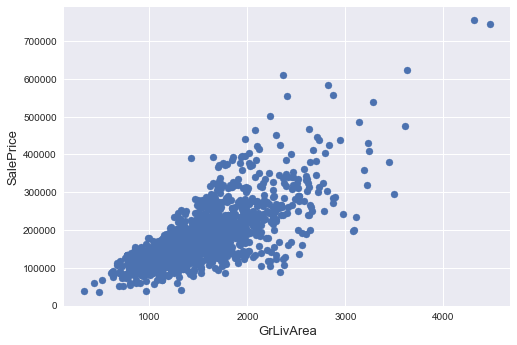

In [4]:
# Outliers:

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [5]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())
all_X.isnull().sum().sum()

6862
7000


13862

In [6]:
#Missing Data
all_data_na = (all_X.isnull().sum() / len(all_X)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.689334
MiscFeature,96.651709
Alley,93.268899
Fence,80.462547
FireplaceQu,48.809113
LotFrontage,16.568864
GarageFinish,5.384881
GarageYrBlt,5.384881
GarageQual,5.384881
GarageCond,5.384881


In [7]:
print(set(train.columns)-set(all_X.columns))

{'SalePrice'}


In [8]:
numeric_feats = all_X.dtypes[all_X.dtypes != "object"].index
numeric_feats = numeric_feats.delete(0) #we don't want to normalize 'Id'
print(numeric_feats)
all_X[numeric_feats] = all_X[numeric_feats].apply(lambda x: (x - x.mean())/(x.std()))  #normalize

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [9]:
all_X = pd.get_dummies(all_X, dummy_na=True) #turn category values into numerical dummy variables
all_X = all_X.fillna(all_X.mean()) #intersting...this seems to fill each column with local mean!

In [10]:
num_train = train.shape[0]
print(all_X.shape)
print(num_train)

X_train = all_X[:num_train]
X_test = all_X[num_train:]
y_train = train.SalePrice

(2897, 329)
1438


In [11]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,60,-0.180815,-0.282183,0.647325,-0.508300,1.043995,0.895920,0.535942,0.602645,-0.292745,...,0,1,0,0,0,0,0,1,0,0
1,20,0.494936,-0.059669,-0.063285,2.187024,0.153052,-0.396388,-0.574231,1.214953,-0.292745,...,0,1,0,0,0,0,0,1,0,0
2,60,-0.045665,0.259591,0.647325,-0.508300,0.978000,0.848056,0.343361,0.107397,-0.292745,...,0,1,0,0,0,0,0,1,0,0
3,70,-0.406066,-0.069343,0.647325,-0.508300,-1.859819,-0.683567,-0.574231,-0.500409,-0.292745,...,0,1,0,1,0,0,0,0,0,0
4,60,0.675136,0.841999,1.357936,-0.508300,0.945002,0.752330,1.408221,0.487838,-0.292745,...,0,1,0,0,0,0,0,1,0,0


In [12]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [66]:
#0.8868420123494959
#0.8968647628534084: 0.7, 0.05, 4, 4, 500, 4, 0.9
#0.8910963660516958: 0.6, 0.02, 4, 2, 500, 4, 0.9
#0.8975841883827453: 0.6, 0.07, 4, 3, 500, 4, 0.9
#0.8978099332543218: 0.6, 0.07, 4, 3, 800, 4, 0.9
#0.89517373352938: 
#{'colsample_bylevel': 0.45, 'colsample_bytree': 0.4, 'gamma': 0.2, 'learning_rate': 0.11, 
#'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 450, 'nthread': 4, 'subsample': 0.9}
#0.8983620861605427: *
#{'colsample_bylevel': 0.5, 'colsample_bytree': 0.4, 'gamma': 0.2, 'learning_rate': 0.12, 
#'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 400, 'nthread': 4, 'subsample': 1}
#0.8931925480725393: 
#{'colsample_bylevel': 0.45, 'colsample_bytree': 0.4, 'gamma': 0.2, 'learning_rate': 0.11, 
#'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.6} Kaggle: 0.13113
#0.8924819901913437:
#{'colsample_bylevel': 0.39, 'colsample_bytree': 0.45, 'gamma': 0.2, 'learning_rate': 0.11, 
#'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.5} Kaggle: 0.13353
#0.8929348579101778:
# {'colsample_bylevel': 0.38, 'colsample_bytree': 0.45, 'gamma': 0.2, 'learning_rate': 0.11, 
#'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.5} Kaggle: 0.12817 *
#0.9221654742823935 *** wow~~~ data cleaning is cool
#{'colsample_bylevel': 0.38, 'colsample_bytree': 0.44, 'gamma': 0.2, 'learning_rate': 0.11, 
#'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.5} Kaggle: 0.12956
#0.9250354346774026
#{'colsample_bylevel': 0.37, 'colsample_bytree': 0.44, 'gamma': 0.2, 'learning_rate': 0.02, 
#'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.6} Kaggle: 0.12944
#0.9266559257543039
# {'colsample_bytree': 0.85, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 4, 
# 'min_child_weight': 5, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.6} Kaggle: 0.12677 **

xgb1 = XGBRegressor()
#target = 'SalePrice'
#IDcol = 'Id'
#predictors = [x for x in train_df_use.columns if x not in [target, IDcol]]
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'gamma': [0.0468, 0.1],
              #Gamma specifies the minimum loss reduction required to make a split.
              'learning_rate': [0.05],
              #Makes the model more robust by shrinking the weights on each step0.01-0.2
              'max_depth': [3, 4],
              #The maximum depth of a tree. high->over fit
              'min_child_weight': [1.7817, 3, 5],
              #Defines the minimum sum of weights of all observations required in a child. high->under fit
              'reg_lambda': [0.8571, 0.5], #reg_alpha=0.4640
              'subsample': [0.5213,0.6], #Subsample ratio of the training instance. 0.5-1
              'colsample_bytree': [0.4603, 0.85],
              #Denotes the fraction of columns to be randomly samples for each tree. 0.5-1
              #'colsample_bylevel': [0.3, 0.5, 0.7],
              #Denotes the subsample ratio of columns for each split, in each level.
              'n_estimators': [2000]#wow..high estimator helps but runs really slow!
             }

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        scoring='neg_mean_squared_log_error',
                        cv = 6,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

#changed to log rsme scoring function:
#-0.013984208220288816: {'colsample_bytree': 0.85, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 4, 
#'min_child_weight': 5, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.6} Kaggle: 0.12677
#-0.012912462627403117: {'colsample_bytree': 0.4603, 'gamma': 0.0468, 'learning_rate': 0.05, 'max_depth': 4, 
#'min_child_weight': 1.7817, 'n_estimators': 2000, 'nthread': 4, 'reg_lambda': 0.5, 'subsample': 0.6} Kaggle: 0.12567**






Fitting 6 folds for each of 96 candidates, totalling 576 fits


[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  8.8min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed: 26.2min
[Parallel(n_jobs=5)]: Done 576 out of 576 | elapsed: 37.7min finished


-0.012912462627403117
{'colsample_bytree': 0.4603, 'gamma': 0.0468, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 1.7817, 'n_estimators': 2000, 'nthread': 4, 'reg_lambda': 0.5, 'subsample': 0.6}


In [14]:
xgb_best = xgb_grid.best_estimator_

In [49]:
# #xgb_best.feature_importances_
# from sklearn.model_selection import KFold, cross_val_score
# n_folds = 5
# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)
# rmsle_cv(model_xgb)

array([20343.077243  , 20191.08420986, 26010.19189237, 17844.21085278,
       22005.85053159])

In [51]:
model_xgb.fit(X_train,y_train)

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred_model = model_xgb.predict(X_train)
rms = sqrt(mean_squared_error(y_train, pred_model))
print(rms)

3418.0114794738497


In [16]:
print(type(xgb_grid.grid_scores_))
#result = pd.DataFrame(xgb_grid.grid_scores_, columns=[])
#group_lr = result.groupby(['learning_rate'])
xgb_grid.grid_scores_[0]

<class 'list'>


mean: 0.91883, std: 0.00318, params: {'colsample_bylevel': 0.38, 'colsample_bytree': 0.44, 'gamma': 0.2, 'learning_rate': 0.11, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 500, 'nthread': 4, 'subsample': 0.5}

In [17]:
print(type(xgb_grid.grid_scores_[0]))
xgb_grid.grid_scores_[0][:]

<class 'sklearn.grid_search._CVScoreTuple'>


({'colsample_bylevel': 0.38,
  'colsample_bytree': 0.44,
  'gamma': 0.2,
  'learning_rate': 0.11,
  'max_depth': 4,
  'min_child_weight': 3,
  'n_estimators': 500,
  'nthread': 4,
  'subsample': 0.5},
 0.9188313494464737,
 array([0.92423985, 0.91613812, 0.91787463, 0.91706523]))

In [18]:
t = [1,2,3]
t.pop(0)
print(len(xgb_grid.grid_scores_))

72


In [19]:
#turn grid CVScoreTuple into a dataframe

meat = []
target = xgb_grid.grid_scores_
for i in range(len(target)):
    tmp = target[i]
    dic = tmp[0]
    score = tmp[1]
    dic['score'] = score
    meat.append(dic)
result = pd.DataFrame(meat)    
result.head()

,colsample_bylevel,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,nthread,score,subsample
0,0.38,0.44,0.2,0.11,4,3,500,4,0.918831,0.5
1,0.38,0.44,0.2,0.11,4,4,500,4,0.922165,0.5
2,0.38,0.44,0.2,0.11,5,3,500,4,0.918453,0.5
3,0.38,0.44,0.2,0.11,5,4,500,4,0.920345,0.5
4,0.38,0.44,0.2,0.12,4,3,500,4,0.918097,0.5


In [20]:
result[result.learning_rate == 0.02].sort_values(by=['score'],ascending=False)

,colsample_bylevel,colsample_bytree,gamma,learning_rate,max_depth,min_child_weight,n_estimators,nthread,score,subsample


In [67]:
print("generating submission file")
predict = xgb_grid.best_estimator_.predict(X_test)
type(predict)
test['SalePrice'] = pd.Series(predict.reshape(1, -1)[0])
submission = pd.concat([test['Id'], test['SalePrice']], axis=1)
submission.to_csv('submission1.csv', index=False)
submission.head()

generating submission file


,Id,SalePrice
0,1461,122235.820312
1,1462,165595.578125
2,1463,196760.984375
3,1464,197718.062500
4,1465,180769.343750


In [22]:


#print(train.columns)
#print(test.columns)
#print(set(train.columns) - set(test.columns))
#train.info()

In [23]:
#train_df = train.copy()
#test_df = test.copy()
#train_df = pd.get_dummies(train_df, dummy_na=True)
#test_df = pd.get_dummies(test_df, dummy_na=True)
#train_df.info()

In [24]:
#print(set(train.columns) - set(train_df.columns))
#print(train_df.shape, test_df.shape)

In [25]:
# #print(train_df.shape)
# print(train_df.columns)
# print(set(train.columns) < set(train_df.columns))
# train_df.head()

In [26]:
# print(numeric_feats)
# test_df.head()

In [27]:
# #numeric_feats = all_X.dtypes[all_X.dtypes != "object"].index
# numeric_feats = train_df.dtypes[train_df.dtypes != "object"].index
# #print(type(numeric_feats))
# numeric_feats = numeric_feats.delete(0) #we don't want to normalize 'Id'
# #print(numeric_feats)
# train_df[numeric_feats] = train_df[numeric_feats].apply(lambda x: (x - x.mean())/(x.std()))  #normalize
# test_df[numeric_feats] = test_df[numeric_feats].apply(lambda x: (x - x.mean())/(x.std()))  #normalize

In [28]:
# #all_X = pd.get_dummies(all_X, dummy_na=True) #turn category values into numerical dummy variables
# #all_X = all_X.fillna(all_X.mean()) #intersting...this seems to fill each column with local mean!
# #print(all_X.mean())
# train_df.head()

In [29]:
# string_feats = [x for x in train.columns if x not in numeric_feats]

In [30]:
# print(string_feats)
# print('\n',numeric_feats)
# print(len(string_feats),len(numeric_feats),len(train.columns))

In [31]:
# #train_df.isnull().sum()
# train_df = train_df.fillna(train_df.mean()) #intersting...this seems to fill each column with local mean!
# test_df = test_df.fillna(train_df.mean())
# #print(train_df.isnull().sum())
# train_df.head()

In [32]:
# #finding the column name where the whole column is NaN

# #[x for x in train_df.columns if train_df.isnull().any() == True]
# type(train_df.isnull().any())
# train_df.isnull().any().index
# train_df.isnull().all()[train_df.isnull().all() == True]

In [33]:
# print(type(numeric_feats))
# print(type(all_NA_feats))
# print(len(all_NA_feats))
# print(len(train_df.columns))

In [34]:
# all_NA_feats = train_df.isnull().all()[train_df.isnull().all() == True].index
# Good_feats = [x for x in train_df.columns if x not in all_NA_feats]
# #print(tmp)
# #[x for x in train.columns if x not in numeric_feats]

In [35]:
# print(type(train_df.isnull()))
# print(train_df[train_df.isnull()].columns)

In [36]:
# train_df_use = train_df.drop(all_NA_feats,1)
# test_df_use = test_df.drop(all_NA_feats,1)
# ##num_train = train.shape[0]
# #X_train = all_X[:num_train]
# #X_test = all_X[num_train:]
# #y_train = train.SalePrice
# train_df_use.info()
# train_df_use.describe()